<a href="https://colab.research.google.com/github/Sanaghufan/Computer-Vision-and-Deep-Learning-Projects/blob/main/HumanActionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] ="sana206"
os.environ["KAGGLE_KEY"] = "7aa7b4eb5c12f3b5324507ef68ac0dc8"
!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

 95% 282M/297M [00:02<00:00, 151MB/s]
100% 297M/297M [00:02<00:00, 137MB/s]


In [ ]:
from IPython.display import clear_output
!unzip human-action-recognition-har-dataset.zip
clear_output()

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('Human Action Recognition/Training_set.csv')
train.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [ ]:
test = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [ ]:
path = "/content/Human Action Recognition"

In [ ]:
test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

In [ ]:
gen = ImageDataGenerator(rescale         = 1./255.,
                         horizontal_flip = True,
                         vertical_flip   = False,
                         zoom_range      = 0.05,
                         rotation_range  = 25)

train_generator = gen.flow_from_dataframe(
    train, # dataframe
    directory = path + "/train", # images data path / folder in which images are there
    x_col = 'filename',
    y_col = 'label',
    color_mode = "rgb",
    target_size = (224, 224), # image height , image width
    class_mode = "sparse",
    batch_size = 32,
    shuffle = True,
    seed = 42)

Found 12600 validated image filenames belonging to 15 classes.


In [ ]:
a = train_generator.class_indices
class_names = list(a.keys())
class_names

['calling',
 'clapping',
 'cycling',
 'dancing',
 'drinking',
 'eating',
 'fighting',
 'hugging',
 'laughing',
 'listening_to_music',
 'running',
 'sitting',
 'sleeping',
 'texting',
 'using_laptop']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
def plot_images(img,labels):
    plt.figure(figsize=[12, 18])
    for i in range(24):
        plt.subplot(6, 4, i+1)
        plt.title(labels[i])
        plt.imshow(img[i])
        plt.axis('off')

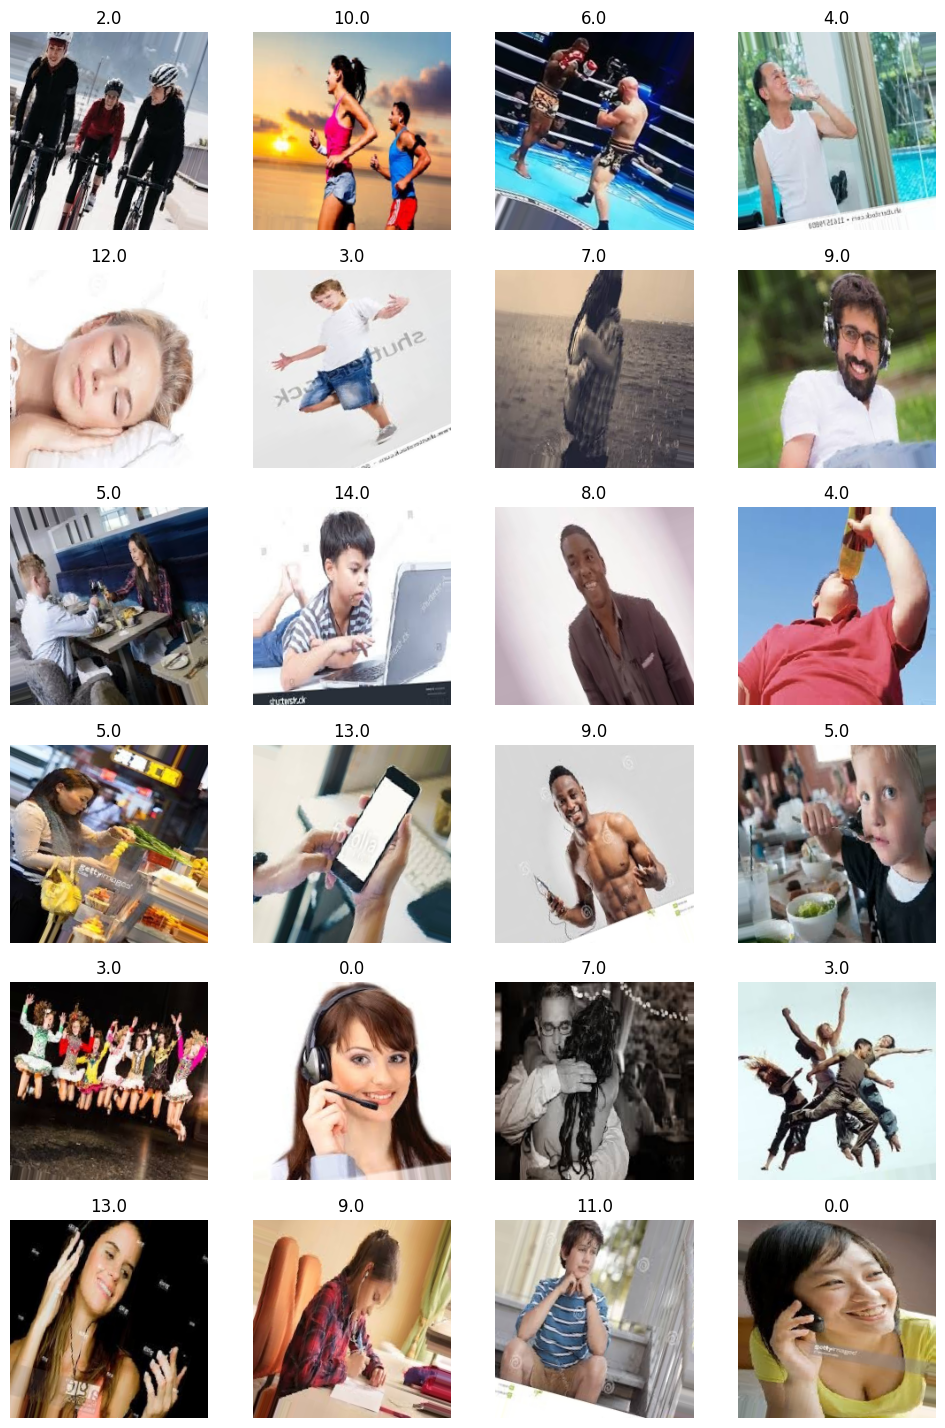

In [ ]:
x,y = next(train_generator)
plot_images(x,y)




In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_gen.flow_from_dataframe(
    test, # dataframe
    directory = path + "/test", # images data path / folder in which images are there
    x_col = 'filename',
    color_mode = "rgb",
    target_size = (224, 224), # image height , image width
    class_mode = None,
    batch_size = 32,
    shuffle = False)

Found 5400 validated image filenames.


In [ ]:
from tensorflow.keras.applications import InceptionV3,VGG19,ResNet101

In [ ]:
resnet = ResNet101()

179648224/179648224 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
resnet.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
x = resnet.output
x=Dense(1024,activation = "relu")(x)
output = Dense(15,activation = "softmax")(x)

In [ ]:
model = Model(inputs = resnet.input,outputs = output)

In [ ]:
valid_df = train.groupby('label').apply(lambda x: x.sample(frac=0.10))

In [ ]:
validation_generator = test_gen.flow_from_dataframe(
    valid_df, # dataframe
    directory   = path + "/train", # images data path / folder in which images are there
    x_col       = 'filename',
    y_col       = 'label',
    color_mode  ="rgb",
    target_size = (224, 224), # image height , image width
    class_mode  = "sparse",
    batch_size  = 32,
    shuffle     = False,
    seed        = 42)

Found 1260 validated image filenames belonging to 15 classes.


In [ ]:
from tensorflow.python.ops import histogram_ops
from datetime import datetime as dt
def train_model():
  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


  model.fit(train_generator, validation_data=validation_generator, epochs=10)

train_model()

Epoch 1/10
394/394 [==============================] - 354s 641ms/step - loss: 2.6808 - accuracy: 0.0843 - val_loss: 2.7653 - val_accuracy: 0.0667
Epoch 2/10
394/394 [==============================] - 247s 626ms/step - loss: 2.5697 - accuracy: 0.1290 - val_loss: 2.9510 - val_accuracy: 0.0667
Epoch 3/10
394/394 [==============================] - 247s 625ms/step - loss: 2.5134 - accuracy: 0.1417 - val_loss: 3.5215 - val_accuracy: 0.0325
Epoch 4/10
394/394 [==============================] - 247s 625ms/step - loss: 2.4539 - accuracy: 0.1558 - val_loss: 2.8506 - val_accuracy: 0.1151
Epoch 5/10
394/394 [==============================] - 246s 624ms/step - loss: 2.3630 - accuracy: 0.1822 - val_loss: 3.1576 - val_accuracy: 0.0825
Epoch 6/10
394/394 [==============================] - 246s 623ms/step - loss: 2.3204 - accuracy: 0.1951 - val_loss: 2.4305 - val_accuracy: 0.1865
Epoch 7/10
394/394 [==============================] - 250s 633ms/step - loss: 2.2766 - accuracy: 0.2021 - val_loss: 2.2959 -